# Team 10 - Unsupervised Learning Predict

© Explore Data Science Academy

---

## Team Members

 - Mulalo Malange
 - Rebecca Kekana
 - Thandiwe Khalaki
 - Njabulo Nyembe
 - John Siphiwe Seelamo


## Introduction: Movie Recommendation Challenge

![](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/best-movies-1614634680.jpg?crop=1.00xw:1.00xh;0,0&resize=980:*)




<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Initializing Comet</a>

<a href=#one>3. Importing Packages</a>

<a href=#two>4. Loading Data</a>

<a href=#three>5. Exploratory Data Analysis (EDA)</a>

<a href=#four>6. Modeling</a>

<a href=#five>7. Model Performance</a>

<a href=#six>8. Model Explanations</a>

<a href=#seven>9. Conclusion</a>

# 1 ) Introduction

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

The task then becomes to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing

# 2 ) Initializing Comet

In [112]:
import comet_ml

In [113]:
# First import comet_ml at the top of your file
from comet_ml import Experiment

In [114]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="WMEw3gZXczce1pWTOpKnPjwMo",
    project_name="movie-recommender",
    workspace="rebeccakekana",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/rebeccakekana/movie-recommender/5c39e486f9c74dcab8522a713d3f19a0
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\BigCheese\\Documents\\Courses\\Data Science - Explore\\Sprint 7\\Predict\\Data' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COM

 <a id="one"></a>
# 3. Importing Packages

In this section we import the necessary libraries needed for Data Analysis, Data Preprocessing, Data Visualization, Feature Engineering and Model Building.

In [145]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


In [146]:
# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate, train_test_split
from surprise import SVD,accuracy
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

In [147]:
# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
%matplotlib inline


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from re import sub
from decimal import Decimal
import locale
#locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
sns.set(font_scale=1.4)
sns.set_style("darkgrid")
%matplotlib inline

In [160]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp
import random

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from re import sub
from decimal import Decimal
import locale
#locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
sns.set(font_scale=1.4)
sns.set_style("darkgrid")
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD, BaselineOnly
from surprise import SVDpp as SSVDpp
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import operator
import heapq

from libreco.data import random_split, DatasetPure, DataInfo
from libreco.data import split_by_ratio_chrono, DatasetFeat
from libreco.algorithms import SVD as libSVD
from libreco.algorithms import SVDpp, BPR
from libreco.algorithms import FM, WideDeep, DeepFM, AutoInt, DIN
from libreco.evaluation import evaluate
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_WARNINGS"] = "FALSE"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
def reset_state(name):
    tf.compat.v1.reset_default_graph()
    print("\n", "=" * 30, name, "=" * 30)

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from time import sleep
import gc

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

# Data visualization
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS

<a id="two"></a>
# 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Load the Train and Test datasets, as well as other relevent datasets from the github repository

In [161]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv") 
movies_df = pd.read_csv("movies.csv")
tags_df = pd.read_csv("tags.csv")
links_df = pd.read_csv("links.csv")

genome_scores_df = pd.read_csv("genome_scores.csv")
genome_tags_df = pd.read_csv("genome_tags.csv")
imdb_data_df = pd.read_csv("imdb_data.csv")

,Data Set,Shape
0,Train,"(10000038, 4)"
1,Test,"(5000019, 2)"
2,Movies,"(62423, 3)"
3,IMDB,"(27278, 6)"
4,Links,"(62423, 3)"
5,Tags,"(1093360, 4)"
6,Genome scores,"(15584448, 3)"
7,Genome tags,"(1128, 2)"


<a id="three"></a>
# 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis refers to the critical process of performing initial investigations on a dataset in order to discover patterns in the data, spot anomalies, to check assumptions with the help of some statistics and graphical representations. The following section analyses and provides an overview of the given data. 

### 5.1) Detailed Dataset Overview

In [213]:
df_shapes = {'Train': df_train.shape,
            'Test': df_test.shape,
            'Movies': movies_df.shape,
            'IMDB': imdb_data_df.shape,
            'Links': links_df.shape,
            'Tags': tags_df.shape,
            'Genome scores': genome_scores_df.shape,
            'Genome tags': genome_tags_df.shape,
}

df_shape = pd.DataFrame(list(df_shapes.items()), columns=['Data Set', 'Shape'])
df_shape

,Data Set,Shape
0,Train,"(10000038, 4)"
1,Test,"(5000019, 2)"
2,Movies,"(62423, 3)"
3,IMDB,"(27278, 6)"
4,Links,"(62423, 3)"
5,Tags,"(1093360, 4)"
6,Genome scores,"(15584448, 3)"
7,Genome tags,"(1128, 2)"


In [214]:
#show full value of dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [215]:
#show full value of dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Display the first 5 entries in each dataframe 
display(df_train.head())
display(df_test.head())
display(movies_df.head())
display(imdb_data_df.head())
display(links_df.head())
display(tags_df.head())
display(genome_scores_df.head())
display(genome_tags_df.head())

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


# 5.2) Data Visualisation

### 5.2.1) Popular Movie Genre Plot

Movie Genre Frequency


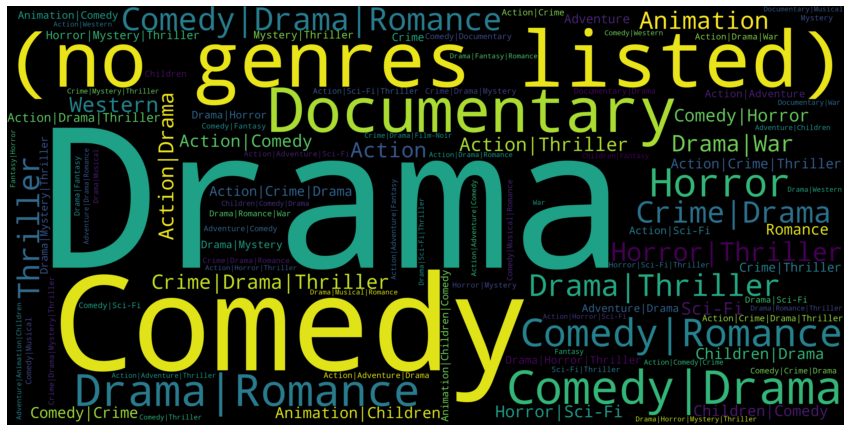

In [133]:
# Calculate number of movies by genre
genre = movies_df['genres'].value_counts()

# Create a word cloud with max 100 
print("Movie Genre Frequency")
wordcloud = WordCloud(max_words=100, background_color='black', height=2000, width=4000).generate_from_frequencies(genre)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [135]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies_df[['movieId', 'genres']],columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

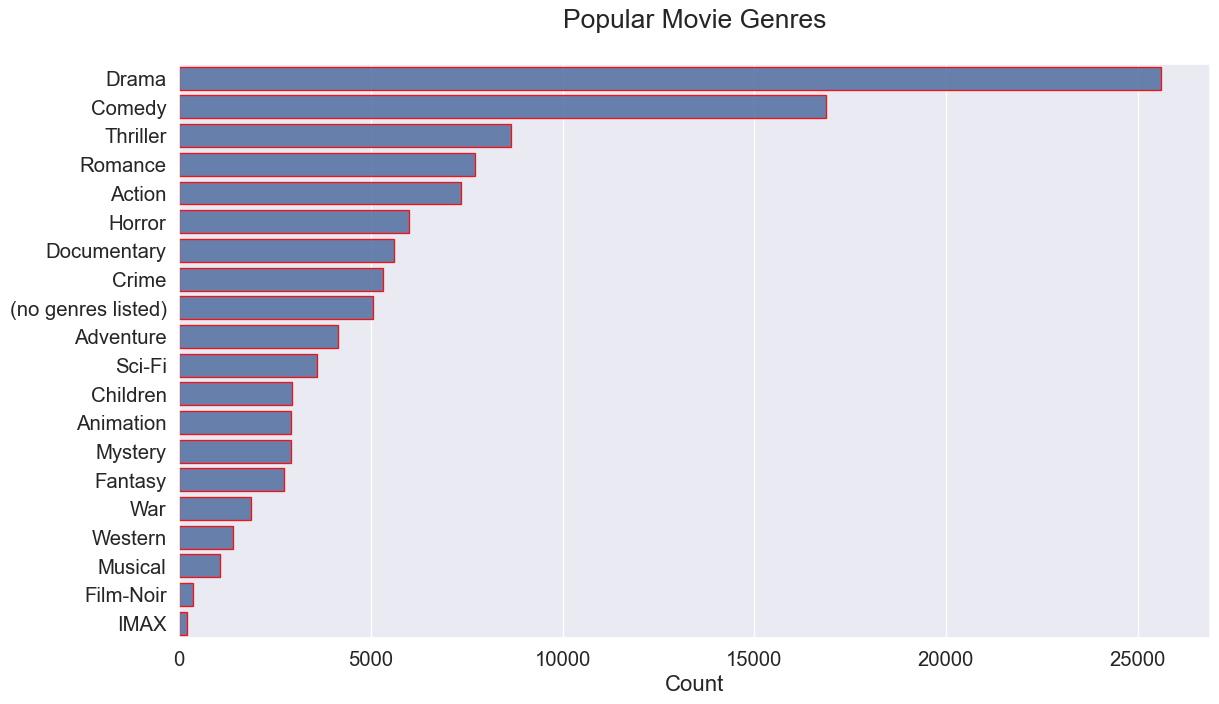

In [136]:
# Plot the genres from most common to 90 common
plot = plt.figure(figsize=(14, 8), dpi =95)
plt.title('Popular Movie Genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,order=movies_genres['genres']
              .value_counts(ascending=False).index, color='b', ec= 'red', alpha=0.9)
plt.ylabel('')
plt.xlabel('Count')
plt.show()


### Observation :

Drama is the most popular genre in the dataset

### 5.2.2) Years with Highest Number of Movies Released

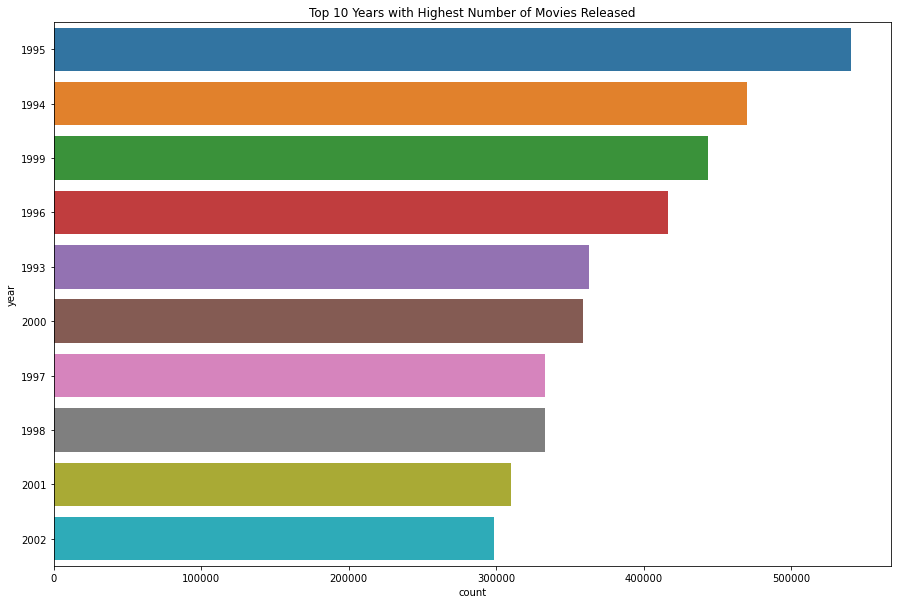

In [34]:
#plots for years
plt.figure(figsize=(15, 10))
ax = sns.countplot(y = movies['year'], data = movies, order = movies['year'].value_counts().index[0:10] )

#add title
ax.set_title("Top 10 Years with Highest Number of Movies Released")
plt.show()

### Observation :

The year 1995 has the highest number of movies released in the dataset

### 5.2.3) Popular Actors Plot

In [153]:
movies_actor = pd.DataFrame(imdb_data_df[['movieId', 'title_cast']],columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the title_cast allocated to each movie
movies_actor= movies_actor[movies_actor['title_cast'].notnull()]
movies_actor.title_cast = movies_actor.title_cast.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-tite_cast combination is in a seperate row
movies_actor = pd.DataFrame([(tup.movieId, d) for tup in movies_actor.itertuples() for d in tup.title_cast],columns=['movieId','title_cast'])

movies_actor = movies_actor.groupby(['title_cast'])['movieId'].count().reset_index(name='Number of Movies')
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=False)

#Sececting the Top 20 actors in movies
movies_actor = movies_actor .head(20)
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=True)

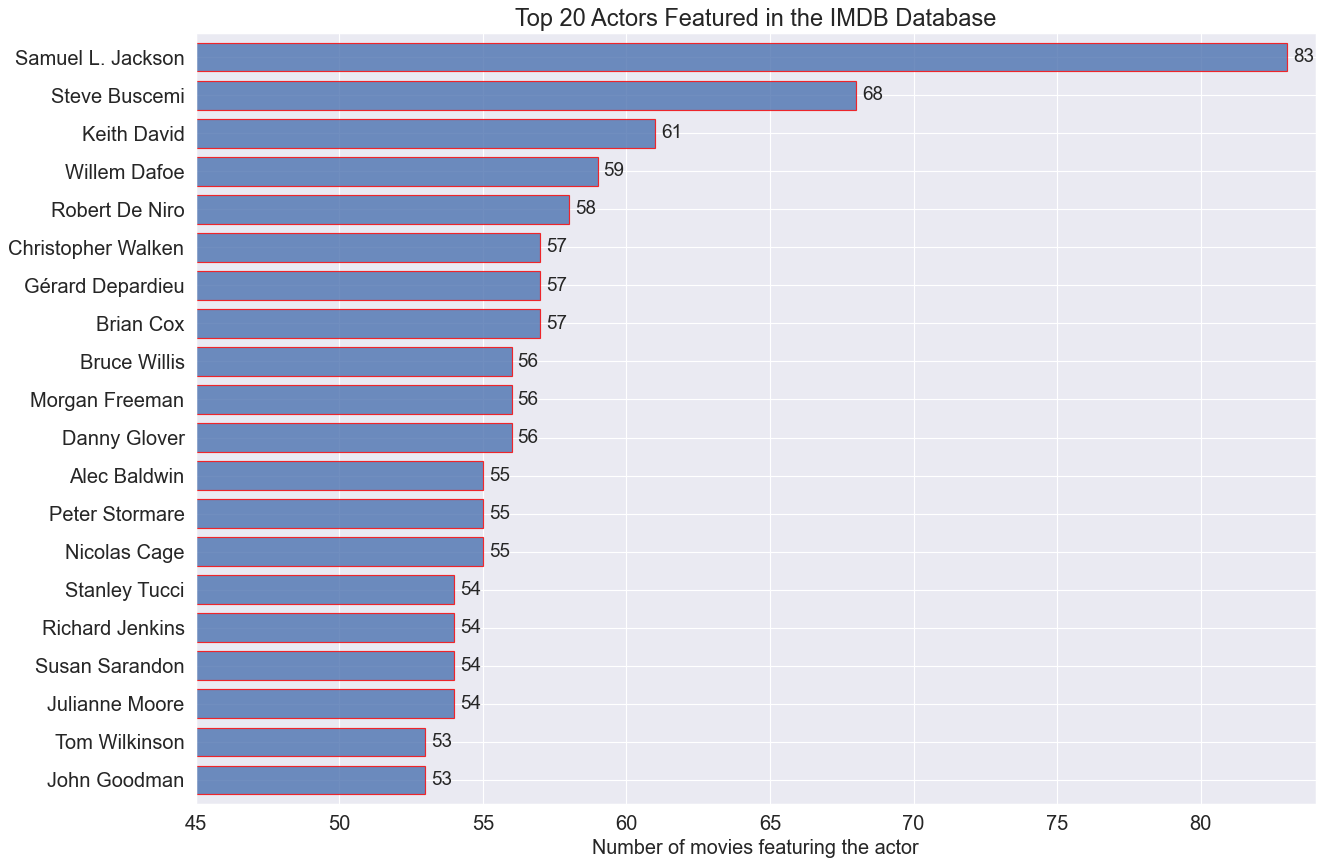

In [154]:
y_labels =movies_actor['title_cast']

# Plot the figure.
plt.figure(figsize=(17, 12),dpi =85)
ax = movies_actor['Number of Movies'].plot(kind='barh',color='b', fontsize=17,
                                           edgecolor='red', xlim=[45,84], width=.75, alpha=0.8)
ax.set_title('Top 20 Actors Featured in the IMDB Database', fontsize=20)
ax.set_xlabel('Number of movies featuring the actor')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)
rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    
    label = "{}".format(x_value)
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),fontsize=16,
                 textcoords="offset points",va='center',ha=ha)            
               

### Observation :

Samuel L. Jackson is the most featured actor in the database followed by Steve Buscemi

### 5.2.4) Popular Movie directors

In [155]:

## grouping the movies by the director and counting the total number of movies per director
movies_director = pd.DataFrame(imdb_data_df[['movieId', 'director']],columns=['movieId', 'director'])

movies_director  = movies_director.groupby(['director'])['movieId'].count().reset_index(name="count")
movies_director =movies_director.sort_values(by='count',ascending=False)

movies_director = movies_director .head(20)
movies_director =movies_director.sort_values(by='count',ascending=True)

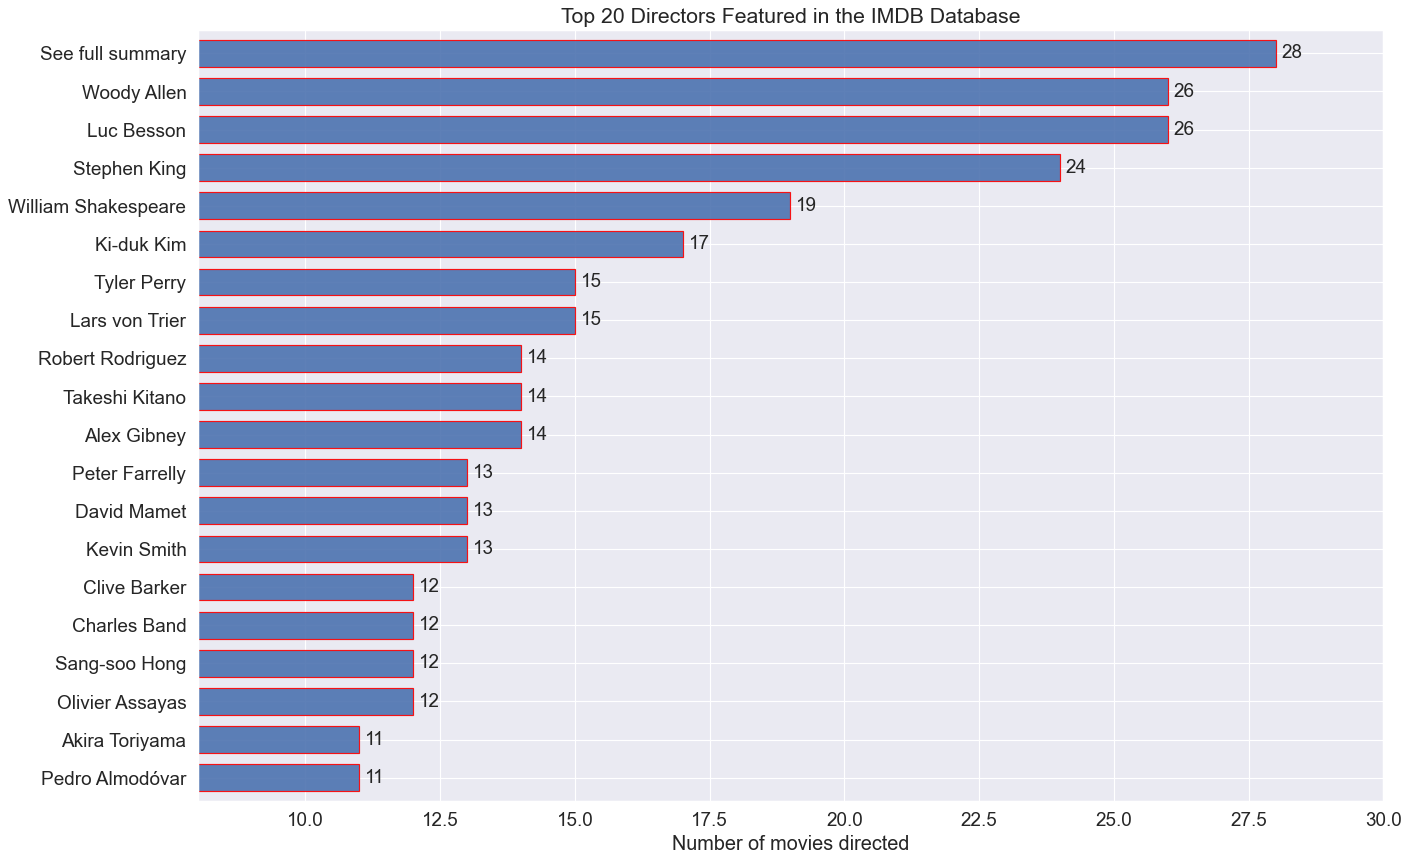

In [156]:
y_labels =movies_director['director']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi =85)
ax = movies_director['count'].plot(kind='barh',color='b', edgecolor='red', 
                                   width=.7, fontsize=16, xlim=[8,30], alpha=0.9)
ax.set_title('Top 20 Directors Featured in the IMDB Database', fontsize=18)
ax.set_xlabel('Number of movies directed')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{}".format(x_value)

    # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),textcoords="offset points"
                 ,va='center',ha=ha, fontsize=16)                                        


### Observation :

- The phrase "See full Summary" appears the most under featured Director
- Both Woody Allen and Luc Besson are featured 26 times in the dataset

### 5.2.5) Popular Play Plots

In [157]:
movies_plot = pd.DataFrame(imdb_data_df[['movieId', 'plot_keywords']],
                             columns=['movieId', 'plot_keywords'])

# Split play plot seperated by "|" and create a list containing the play plot allocated to each movie
movies_plot= movies_plot[movies_plot['plot_keywords'].notnull()]
movies_plot.plot_keywords = movies_plot.plot_keywords.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-play_plot combination is in a seperate row
movies_plot = pd.DataFrame([(tup.movieId, d) for tup in movies_plot.itertuples() for d in tup.plot_keywords],columns=['movieId','plot_keywords'])

movies_plot = movies_plot.groupby(['plot_keywords'])['movieId'].count().reset_index(name="count")
movies_plot =movies_plot.sort_values(by='count',ascending=False)

movies_plot = movies_plot.head(20)
movies_plot =movies_plot.sort_values(by='count',ascending=True)

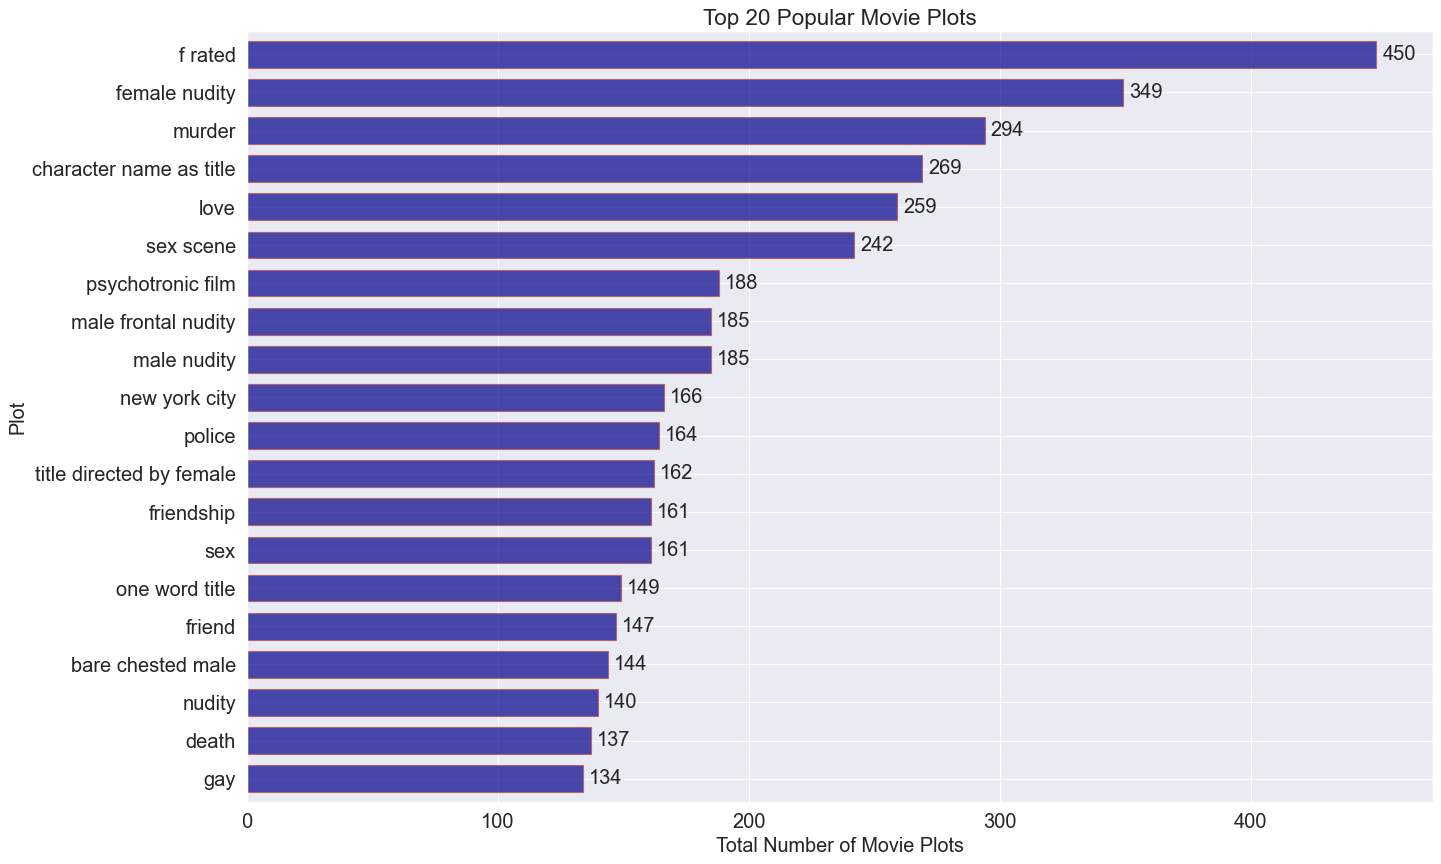

In [158]:
y_labels =movies_plot['plot_keywords']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi=85)
ax = movies_plot ['count'].plot(kind='barh',color='darkblue', fontsize=17,
                                           edgecolor='r', width=.7, alpha=0.7)
ax.set_title('Top 20 Popular Movie Plots', fontsize=19)
ax.set_xlabel('Total Number of Movie Plots')
ax.set_ylabel('Plot')
ax.set_yticklabels(y_labels)

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    if x_value < 0:
        
        space *= -1

        ha = 'right'

    
    label = "{}".format(x_value)
    
     # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),
                 textcoords="offset points",va='center',ha=ha, fontsize=17) 


### Observation :

"f rated" and "female nudity" are the most popular movie plots in the dataset

### 5.2.6) Ratings Distribution  

The Average Rating is : 3.5


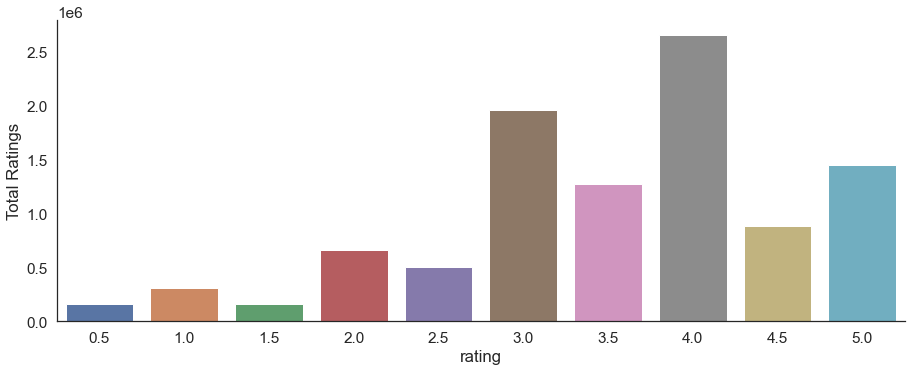

In [167]:
# print the avarage rating
print (f'The Average Rating is : {round(np.mean(df_train["rating"]),1)}')

# create a catt plot for total ratings
with sns.axes_style('white'):
    plt = sns.catplot("rating", data=df_train, aspect=2.5, kind='count')
    plt.set_ylabels("Total Ratings")

### Observation :

We can see that the majority of movies ratings are between 3.0 to 5.0.

In [170]:
# Data visualization
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS

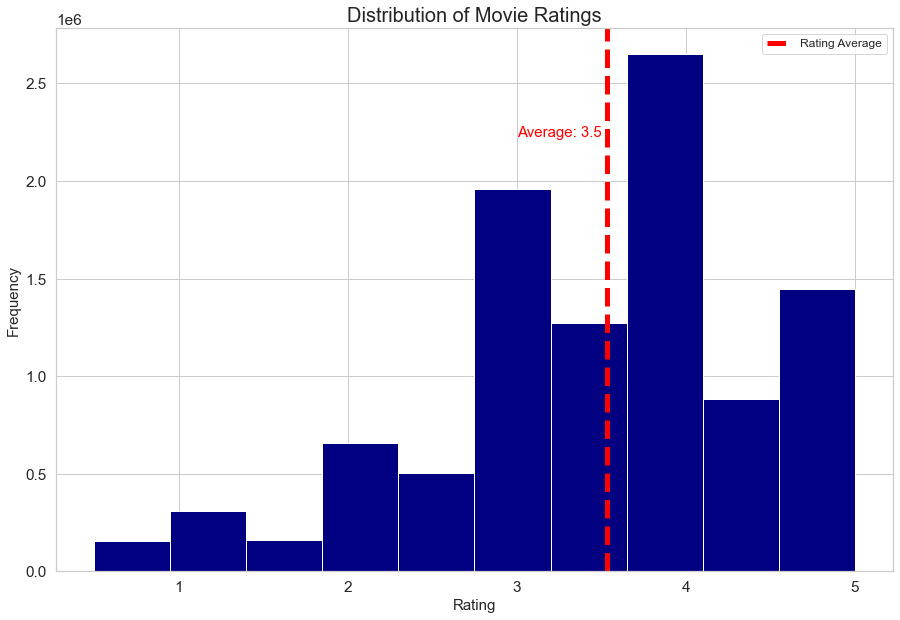

In [172]:
# create graph for rating add the avarage line
# create a plot 
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')

ax = sns.distplot(df_train['rating'], bins=10, kde=False, hist_kws=dict(alpha=1), color="navy")

# use avarage of rating in training dataframe
avg = df_train['rating'].mean()

#create a line for rating avarage
plt.axvline(x=avg, label='Rating Average', lw=5, ls='--', color='red')
trans = ax.get_xaxis_transform()
plt.text(3, 0.8, f'Average: {round(avg,1)}', transform=trans, fontsize=15, color='red')

# show title 
plt.title('Distribution of Movie Ratings', size=20)
plt.xlabel('Rating', size=15)
plt.ylabel('Frequency', size=15)
plt.legend(fontsize=12)

### Observation :

The average movie rating is 3.5

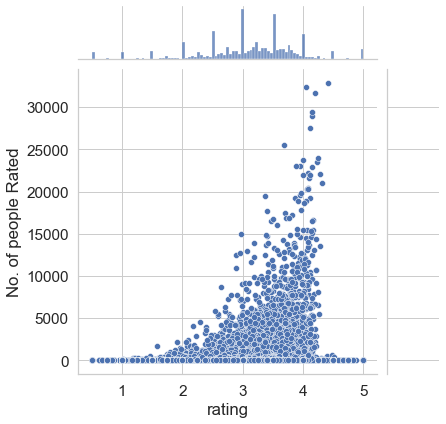

In [206]:
movies_summ = pd.DataFrame(movies.groupby(by='title')['rating'].mean())
movies_summ['No. of people Rated'] = movies.groupby(by='title')['rating'].count()
movies_summ.sort_values(by=['rating'], ascending=False)
movies_summ.sort_values(by=['No. of people Rated'], ascending=False)
sns.jointplot(x=movies_summ['rating'],y=movies_summ['No. of people Rated'])

### Observation :

From the above graph we can see that most movies received better rating between 2 and 4, which can mean that most movies are good. With only few movies with less than 1 rating, meaning fewer movies are worse.

## 5.2.7 __Users with more ratings feedback__

The feedback that users give about the movie is very important, it might help find which movie does most users love, which one is the best and which one is the worst. This ratings can help nominate movies for Oscars. 

On this section we focus on checking the top users with more number of ratings

Text(0, 0.5, 'Number of Ratings')

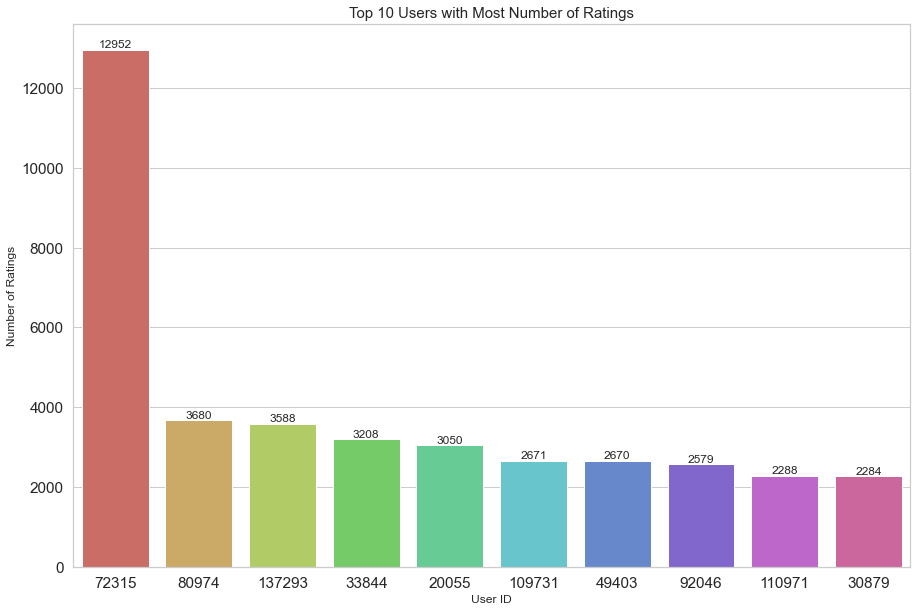

In [177]:
# create figure with white grid style
plt.figure(figsize=(15,10))
sns.set_style("whitegrid") 

# use user id data from train df
# plot barplot
data = df_train['userId'].value_counts(ascending=False).head(10)
fig = sns.barplot(x=data.index, y=data, order=data.index, palette='hls')

for p in fig.patches:
        fig.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')

# add title and label
plt.title("Top 10 Users with Most Number of Ratings", size=15)
plt.xlabel("User ID", size=12)
plt.ylabel("Number of Ratings", size=12)

In [179]:
# Total Number of ratings by the top 10 Users
tot_rating = df_train['userId'].value_counts().head(10).sum()
tot_movies = df_train["movieId"].nunique()
print("These Top 10 Users have provided a total of " + str(tot_rating) + " ratings together for " + str(tot_movies) + " movies")

These Top 10 Users have provided a total of 38970 ratings together for 48213 movies


### Observations :
User ID 72315 has more ratings compared to other users, the ratings of more than 12000, the second, third, fourth and number five on the plot above has ratings from 3050 - 3680, which is not even half of the first user. the sixth to number ten has 2000 ratings. this shows that users do rate movies.

Checking the total number of movies which the users had to rating of 48213, and they rated 38970 movies out of those movies, that is not bad number as it is more than half the total number of movies.

### 5.2.7) Movie's Annual Budget

In [180]:
movies_ =imdb_data_df.sort_values(by='budget',ascending=False)
print(movies_.budget.unique())

['ZAR10,000,000' 'VEB4,273,248' 'UAH10,000' ... '$1,000' '$0' nan]


The bugdet feature has different currency.In this notebook we will consider US dollars $ since most movies are in US dollars.

In [185]:

merged_inner = pd.merge(left=movies_df, right=imdb_data_df, left_on='movieId', right_on='movieId')


movies_budget = pd.DataFrame(merged_inner[['movieId', 'title','budget']],columns=['movieId', 'title','budget'])

movies_budget= movies_budget[movies_budget['title'].notnull()]

movies_budget['budget'].replace('', np.nan, inplace=True)
movies_budget.dropna(subset=['budget'], inplace=True)

# Split title seperated by "|" and create a list containing the title allocated to each movie
movies_budget.title = movies_budget.title.apply(lambda x: int(re.findall(r"\d\d\d\d",x).pop(0)))
movies_budget.budget = movies_budget.budget.apply(lambda x: int(re.sub("[^0-9]", "", x)) if str(x)[:1] =='$' else None)
movies_budget = movies_budget[movies_budget['budget'].notnull()]

In [186]:
print('list of movie\'s year of release :', list(pd.unique(movies_budget['title'])))

list of movie's year of release : [1995, 1994, 1996, 1992, 1993, 1991, 1990, 1997, 1600, 1998, 2000, 1999, 1900, 2001, 3000, 1989, 2002, 1956, 2003, 1000, 2004, 1983, 1492, 1984, 1985, 2046, 2005, 2006, 2009, 2007, 2008, 1408, 1976, 2012, 2010, 1974, 2011, 2016, 1911, 2013, 1968, 1942, 2014, 2050, 1453, 2015, 1988, 1981]


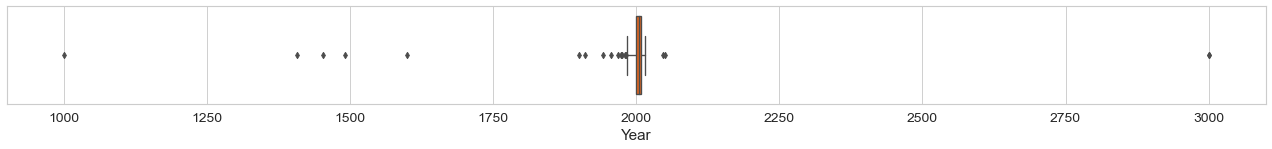

In [187]:
fig,ax = plt.subplots(figsize=(25, 2), dpi=65)
sns.boxplot(x='title', data=movies_budget, palette='hot')
ax.set_xlabel('Year')
plt.show()

### Observation :

- The data has movies made beyod 2022 (such as a movie made in 3000) this values are cearly outliers.
- The first film was made in 1888, meaning that any values before 1888 are outliers.

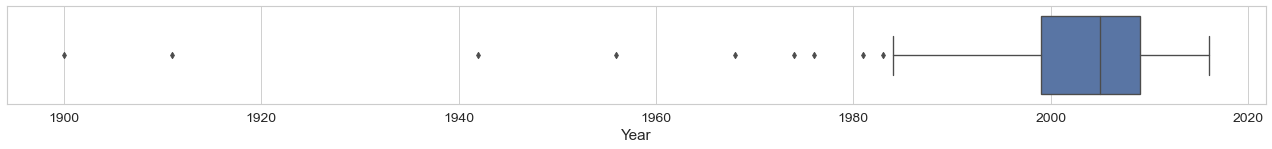

In [190]:
#We then select movies that are made from 1888 up until the current year 2022
movies_budget =movies_budget[movies_budget['title'] > 1888]
movies_budget =movies_budget[movies_budget['title'] <= 2022]

fig,ax = plt.subplots(figsize=(25, 2), dpi=65)
sns.boxplot(x = 'title', data = movies_budget, color='b')
ax.set_xlabel('Year')
plt.show()


### Observation :

The above box and whisker is skewed to the right,this is an indication that more movies where released from the late 90s.This is because of technogyical advances and more investment/budget to the production of movies.

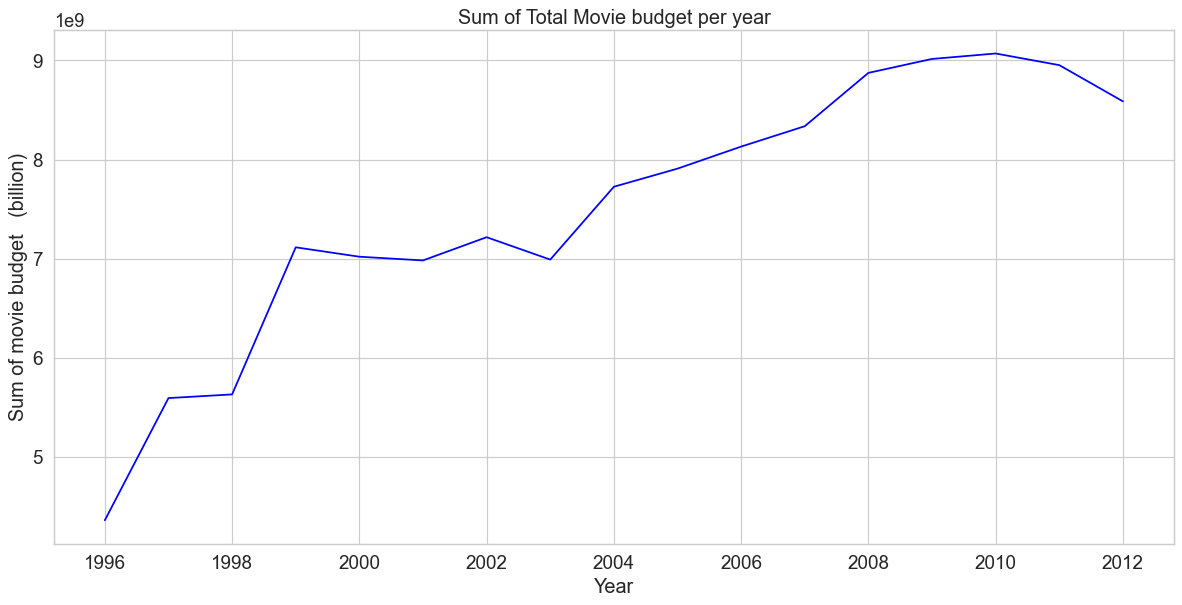

In [193]:
movies_budget =movies_budget[movies_budget['title'] > 1995]
movies_budget =movies_budget[movies_budget['title'] <= 2022]
Total_movie_budget = movies_budget.groupby("title")["budget"].sum().reset_index(name="Sum of movie budget")
Total_movie_budget

fig,ax = plt.subplots(figsize=(17, 8), dpi=85)

Total_movie_budget.plot.line(x='title',y='Sum of movie budget', ax=ax, color='blue', 
                             legend=False, fontsize=16)
ax.set_title('Sum of Total Movie budget per year')
ax.set_xlabel('Year')
ax.set_ylabel('Sum of movie budget   (billion)')

plt.show()




<a id="four"></a>
# 4. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

## 4.1 Content Based Filtering

Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user. These systems have become ubiquitous, and can be commonly seen in online stores, movies databases and job finders. In this notebook, we will explore Content-based recommendation systems and implement a simple version of one using Python and the Pandas library.


### Preprocessing

First, let's get all of the imports out of the way:


In [36]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now let's read each file into their Dataframes:


In [37]:
ratings_df = pd.read_csv("train.csv")
movies_df = pd.read_csv("movies.csv")

Let's also remove the year from the **title** column by using pandas' replace function and store in a new **year** column.


In [38]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


With that, let's also split the values in the **Genres** column into a **list of Genres** to simplify for future use. This can be achieved by applying Python's split string function on the correct column.


In [39]:
#Every genre is separated by a | so we simply have to call the split function on |
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


Since keeping genres in a list format isn't optimal for the content-based recommendation system technique, we will use the One Hot Encoding technique to convert the list of genres to a vector where each column corresponds to one possible value of the feature. This encoding is needed for feeding categorical data. In this case, we store every different genre in columns that contain either 1 or 0. 1 shows that a movie has that genre and 0 shows that it doesn't. Let's also store this dataframe in another variable since genres won't be important for our first recommendation system.


In [40]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies_df.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, let's look at the ratings dataframe.


In [41]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Every row in the ratings dataframe has a user id associated with at least one movie, a rating and a timestamp showing when they reviewed it. We won't be needing the timestamp column, so let's drop it to save memory.


In [42]:
#Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


### Content-Based recommendation system

Now, let's take a look at how to implement **Content-Based** or **Item-Item recommendation systems**. This technique attempts to figure out what a user's favourite aspects of an item is, and then recommends items that present those aspects. In our case, we're going to try to figure out the input's favorite genres from the movies and ratings given.

Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the **userInput**. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .


In [43]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


#### Add movieId to input user

With the input complete, let's extract the input movie's ID's from the movies dataframe and add them into it.

We can achieve this by first filtering out the rows that contain the input movie's title and then merging this subset with the input dataframe. We also drop unnecessary columns for the input to save memory space.


In [44]:
#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,164600,Akira,4.5
5,1968,"Breakfast Club, The",5.0


We're going to start by learning the input's preferences, so let's get the subset of movies that the input has watched from the Dataframe containing genres defined with binary values.


In [45]:
#Filtering out the movies from the input
userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
292,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1241,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1879,1968,"Breakfast Club, The","[Comedy, Drama]",1985,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42774,164600,Akira,"[Action, Crime, Thriller]",2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We'll only need the actual genre table, so let's clean this up a bit by resetting the index and dropping the movieId, title, genres and year columns.


In [46]:
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we're ready to start learning the input's preferences!

To do this, we're going to turn each genre into weights. We can do this by using the input's reviews and multiplying them into the input's genre table and then summing up the resulting table by column. This operation is actually a dot product between a matrix and a vector, so we can simply accomplish by calling the Pandas "dot" function.


In [47]:
inputMovies['rating']

0    3.5
1    2.0
2    5.0
3    4.5
4    4.5
5    5.0
Name: rating, dtype: float64

In [48]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#The user profile
userProfile

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.0
Fantasy                5.5
Romance                0.0
Drama                  9.5
Action                 9.5
Crime                 10.0
Thriller              10.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

Now, we have the weights for every of the user's preferences. This is known as the User Profile. Using this, we can recommend movies that satisfy the user's preferences.


Let's start by extracting the genre table from the original dataframe:


In [49]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
genreTable.shape

(62423, 20)

In [51]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

movieId
1    0.491228
2    0.245614
3    0.152047
4    0.263158
5    0.152047
dtype: float64

In [52]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()

movieId
5018      0.730994
64645     0.725146
122787    0.725146
144324    0.725146
81132     0.725146
dtype: float64

Now here's the recommendation table!


In [53]:
#The final recommendation table
movies_df.loc[movies_df['movieId'].isin(recommendationTable_df.head(20).keys())]

,movieId,title,genres,year
4614,4719,Osmosis Jones,"[Action, Animation, Comedy, Crime, Drama, Roma...",2001
4912,5018,Motorama,"[Adventure, Comedy, Crime, Drama, Fantasy, Mys...",1991
8253,8968,After the Sunset,"[Action, Adventure, Comedy, Crime, Thriller]",2004
8638,26184,"Diamond Arm, The (Brilliantovaya ruka)","[Action, Adventure, Comedy, Crime, Thriller]",1968
9177,27344,Revolutionary Girl Utena: Adolescence of Utena...,"[Action, Adventure, Animation, Comedy, Drama, ...",1999
9542,31367,"Chase, The","[Action, Adventure, Comedy, Crime, Romance, Th...",1994
9636,31921,"Seven-Per-Cent Solution, The","[Adventure, Comedy, Crime, Drama, Mystery, Thr...",1976
12879,64645,The Wrecking Crew,"[Action, Adventure, Comedy, Crime, Drama, Thri...",1968
15389,81132,Rubber,"[Action, Adventure, Comedy, Crime, Drama, Film...",2010
17470,91542,Sherlock Holmes: A Game of Shadows,"[Action, Adventure, Comedy, Crime, Mystery, Th...",2011


### Advantages and Disadvantages of Content-Based Filtering

##### Advantages

*   Learns user's preferences
*   Highly personalized for the user

##### Disadvantages

*   Doesn't take into account what others think of the item, so low quality item recommendations might happen
*   Extracting data is not always intuitive
*   Determining what characteristics of the item the user dislikes or likes is not always obvious


## 4.2 Collaborative Filtering


### Preprocessing

First, let's get all of the imports out of the way:


In [54]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now let's read each file into their Dataframes:


In [55]:
#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv('movies.csv')
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv('train.csv')

Let's also take a peek at how each of them are organized:


In [56]:
#Head is a function that gets the first N rows of a dataframe. N's default is 5.
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


So each movie has a unique ID, a title with its release year along with it (Which may contain unicode characters) and several different genres in the same field. Let's remove the year from the title column and place it into its own one by using the handy [extract](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01#pandas.Series.str.extract) function that Pandas has.


In [57]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())

In [58]:
# Let's look at the result!

movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


With that, let's also drop the genres column since we won't need it for this particular recommendation system.


In [59]:
#Dropping the genres column
movies_df = movies_df.drop('genres', 1)

In [60]:
# Here's the final movies dataframe:
movies_df.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


Next, let's look at the ratings dataframe.


In [61]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Every row in the ratings dataframe has a user id associated with at least one movie, a rating and a timestamp showing when they reviewed it. We won't be needing the timestamp column, so let's drop it to save on memory.


In [62]:
#Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop('timestamp', 1)

Here's how the final ratings Dataframe looks like:


In [63]:
ratings_df.head()

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


### Collaborative Filtering

Now it's time to start our work on recommendation systems.

The first technique we're going to take a look at is called **Collaborative Filtering**, which is also known as **User-User Filtering**. As hinted by its alternate name, this technique uses other users to recommend items to the input user. It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input. There are several methods of finding similar users (Even some making use of Machine Learning), and the one we will be using here is going to be based on the **Pearson Correlation Function**.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/images/User_Item.png" width=800px>

The process for creating a User Based recommendation system is as follows:

*   Select a user with the movies the user has watched
*   Based on his rating of the movies, find the top X neighbours
*   Get the watched movie record of the user for each neighbour
*   Calculate a similarity score using some formula
*   Recommend the items with the highest score

Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the userInput. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .


In [64]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


#### Add movieId to input user

With the input complete, let's extract the input movies's ID's from the movies dataframe and add them into it.

We can achieve this by first filtering out the rows that contain the input movies' title and then merging this subset with the input dataframe. We also drop unnecessary columns for the input to save memory space.


In [65]:
#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,164600,Akira,4.5
5,1968,"Breakfast Club, The",5.0


#### The users who has seen the same movies

Now with the movie ID's in our input, we can now get the subset of users that have watched and reviewed the movies in our input.


In [66]:
#Filtering out users that have watched movies that the input has watched and storing it
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

,userId,movieId,rating
82,121814,296,5.0
119,158849,1,5.0
154,97203,1,5.0
194,161871,1,3.0
416,59292,296,5.0


We now group up the rows by user ID.


In [67]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])

Let's look at one of the users, e.g. the one with userID=1680.


In [68]:
userSubsetGroup.get_group(1680)

,userId,movieId,rating
1220996,1680,1274,5.0


Let's also sort these groups so the users that share the most movies in common with the input have higher priority. This provides a richer recommendation since we won't go through every single user.


In [69]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

Now let's look at the first user.


In [70]:
userSubsetGroup[0:3]

[(43983,
           userId  movieId  rating
  3066576   43983      296     5.0
  3334368   43983     1274     2.5
  4538439   43983     1968     2.5
  7186741   43983        1     0.5
  7434828   43983        2     0.5),
 (47001,
           userId  movieId  rating
  3023697   47001        2     4.0
  4198905   47001      296     3.0
  5151252   47001     1274     3.5
  8291091   47001        1     4.0
  8408923   47001     1968     1.5),
 (48197,
           userId  movieId  rating
  810484    48197        2     3.5
  1619555   48197        1     5.0
  1673286   48197      296     5.0
  1721958   48197     1274     4.0
  6148121   48197     1968     4.5)]

#### Similarity of users to input user

Next, we are going to compare all users (not really all !!!) to our specified user and find the one that is most similar.\
We're going to find out how similar each user is to the input through the **Pearson Correlation Coefficient**. It is used to measure the strength of a linear association between the two variables. The formula for finding this coefficient between sets X and Y with N values can be seen in the image below.

Why Pearson Correlation?

Pearson correlation is invariant to scaling, i.e. multiplying all elements by a nonzero constant or adding any constant to all elements. For example, if you have two vectors X and Y, then, pearson(X, Y) == pearson(X, 2 \* Y + 3). This is a pretty important property in recommendation systems because, for example, two users might rate two series of items totally differently in terms of absolute rates, but they would be similar users (i.e. with similar ideas) with similar rates in various scales .

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")

The values given by the formula vary from r = -1 to r = 1, where 1 forms a direct correlation between the two entities (it means a perfect positive correlation) and -1 forms a perfect negative correlation.

In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.


We will select a subset of users to iterate through. This limit is imposed because we don't want to waste too much time going through every single user.


In [71]:
userSubsetGroup = userSubsetGroup[0:100]

Now, we calculate the Pearson Correlation between input user and subset group, and store it in a dictionary, where the key is the user Id and the value is the coefficient.


In [72]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0


In [73]:
pearsonCorrelationDict.items()

dict_items([(43983, 0.7918903339499381), (47001, -0.7093169886164387), (48197, 0.6016568375961863), (54125, 0.986690271720408), (57946, 0.2508726030021272), (76334, 0.8713121398246098), (96495, 0.8360171835451685), (117801, 0.774023530673005), (120443, 0.7674257668936518), (120901, 0.4688072309384956), (125551, 0.8272781516947562), (137196, -0.5709161420029026), (138487, 0.7844645405527362), (150141, -0.2632248664483318), (159612, 0.6020183016345595), (265, -0.16116459280507606), (321, 1.0), (3394, 0.2548235957188128), (3777, -0.7112655491946736), (4006, 0.4364357804719848), (4950, 0.5606119105813882), (5019, 0.9028289727756884), (6118, -0.8553372034476997), (7540, 0.8021806287494233), (8150, 0.4923659639173309), (8641, -0.899228803025897), (10106, 0.8181818181818182), (10357, -0.8280786712108251), (10496, 0.8181818181818182), (10508, 0.9438798074485389), (10717, -0.6225728063646904), (11491, -0.9847319278346618), (11778, 0.9864400504156211), (11952, 0.19069251784911845), (12274, 0.426

In [74]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.791890,43983
1,-0.709317,47001
2,0.601657,48197
3,0.986690,54125
4,0.250873,57946


#### The top x similar users to input user

Now let's get the top 50 users that are most similar to the input.


In [75]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
16,1.000000,321
53,0.995910,25619
89,0.994334,47745
3,0.986690,54125
32,0.986440,11778


Now, let's start recommending movies to the input user.

#### Rating of selected users to all movies

We're going to do this by taking the weighted average of the ratings of the movies using the Pearson Correlation as the weight. But to do this, we first need to get the movies watched by the users in our **pearsonDF** from the ratings dataframe and then store their correlation in a new column called \_similarityIndex". This is achieved below by merging of these two tables.


In [76]:
topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,1.0,321,1127,4.0
1,1.0,321,500,3.0
2,1.0,321,1977,4.0
3,1.0,321,1573,3.0
4,1.0,321,4270,1.5


Now all we need to do is simply multiply the movie rating by its weight (the similarity index), then sum up the new ratings and divide it by the sum of the weights.

We can easily do this by simply multiplying two columns, then grouping up the dataframe by movieId and then dividing two columns:

It shows the idea of all similar users to candidate movies for the input user:


In [77]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,1.0,321,1127,4.0,4.0
1,1.0,321,500,3.0,3.0
2,1.0,321,1977,4.0,4.0
3,1.0,321,1573,3.0,3.0
4,1.0,321,4270,1.5,1.5


In [78]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,34.441227,127.245038
2,38.408649,100.807202
3,4.050568,8.377308
4,0.574427,0.574427
5,3.006241,5.849623


In [79]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.694556,1
2,2.624596,2
3,2.068181,3
4,1.000000,4
5,1.945826,5


Now let's sort it and see the top 20 movies that the algorithm recommended!


In [80]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
3260,5.0,3260
1728,5.0,1728
7577,5.0,7577
7936,5.0,7936
26350,5.0,26350
775,5.0,775
8239,5.0,8239
1889,5.0,1889
6828,5.0,6828


In [81]:
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,year
759,775,Spirits of the Dead,1968
1662,1728,"Winter Guest, The",1997
1800,1889,Insomnia,1997
3167,3260,Howards End,1992
6705,6828,"Sunday in the Country, A (Un dimanche à la cam...",1984
6964,7089,Amarcord,1973
7363,7577,"Magic Flute, The (Trollflöjten)",1975
7546,7936,Shame (Skammen),1968
7688,8239,Viridiana,1961
8757,26350,"Passenger, The (Professione: reporter)",1975


### Advantages and Disadvantages of Collaborative Filtering

##### Advantages

*   Takes other user's ratings into consideration
*   Doesn't need to study or extract information from the recommended item
*   Adapts to the user's interests which might change over time

##### Disadvantages

*   Approximation function can be slow
*   There might be a low amount of users to approximate
*   Privacy issues when trying to learn the user's preferences


## 4.3 SVD

In [82]:
sample_df = pd.read_csv("sample_submission.csv")

In [83]:
sample_df.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [84]:
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], Reader())

In [85]:
train_set, test_set = train_test_split(data, test_size=0.20)

In [86]:
svd=SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

In [87]:
#Fitting the model
svd.fit(train_set)

In [ ]:
# Make predictions
test_pred= svd.test(test_set)

In [ ]:
#Evaluate model performance
rsme_collabo = accuracy.rmse(test_pred,verbose=True)

In [ ]:
test = pd.read_csv('test.csv')
test.sample(10)



In [ ]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test.itertuples(index=False):
    output=svd.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

In [ ]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVD.csv", index=False)

In [ ]:
Team_10_submission = pd.DataFrame({'id': results.Id, 'rating': results.rating})
Team_10_submission.to_csv('submission.csv', index=False)